In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.utils  import to_categorical
import pickle

In [2]:
def load_rand():
    X=[]
    dir_path='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [3]:
X=load_rand()

  0%|          | 0/6 [00:00<?, ?it/s]

freshapple


 50%|█████     | 3/6 [00:00<00:00,  7.48it/s]

freshbanana
freshguava
rottenapple


100%|██████████| 6/6 [00:00<00:00,  8.16it/s]

rottenbanana
rottenguava


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshapple','freshbanana','freshguava','rottenapple','rottenbanana','rottenguava']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

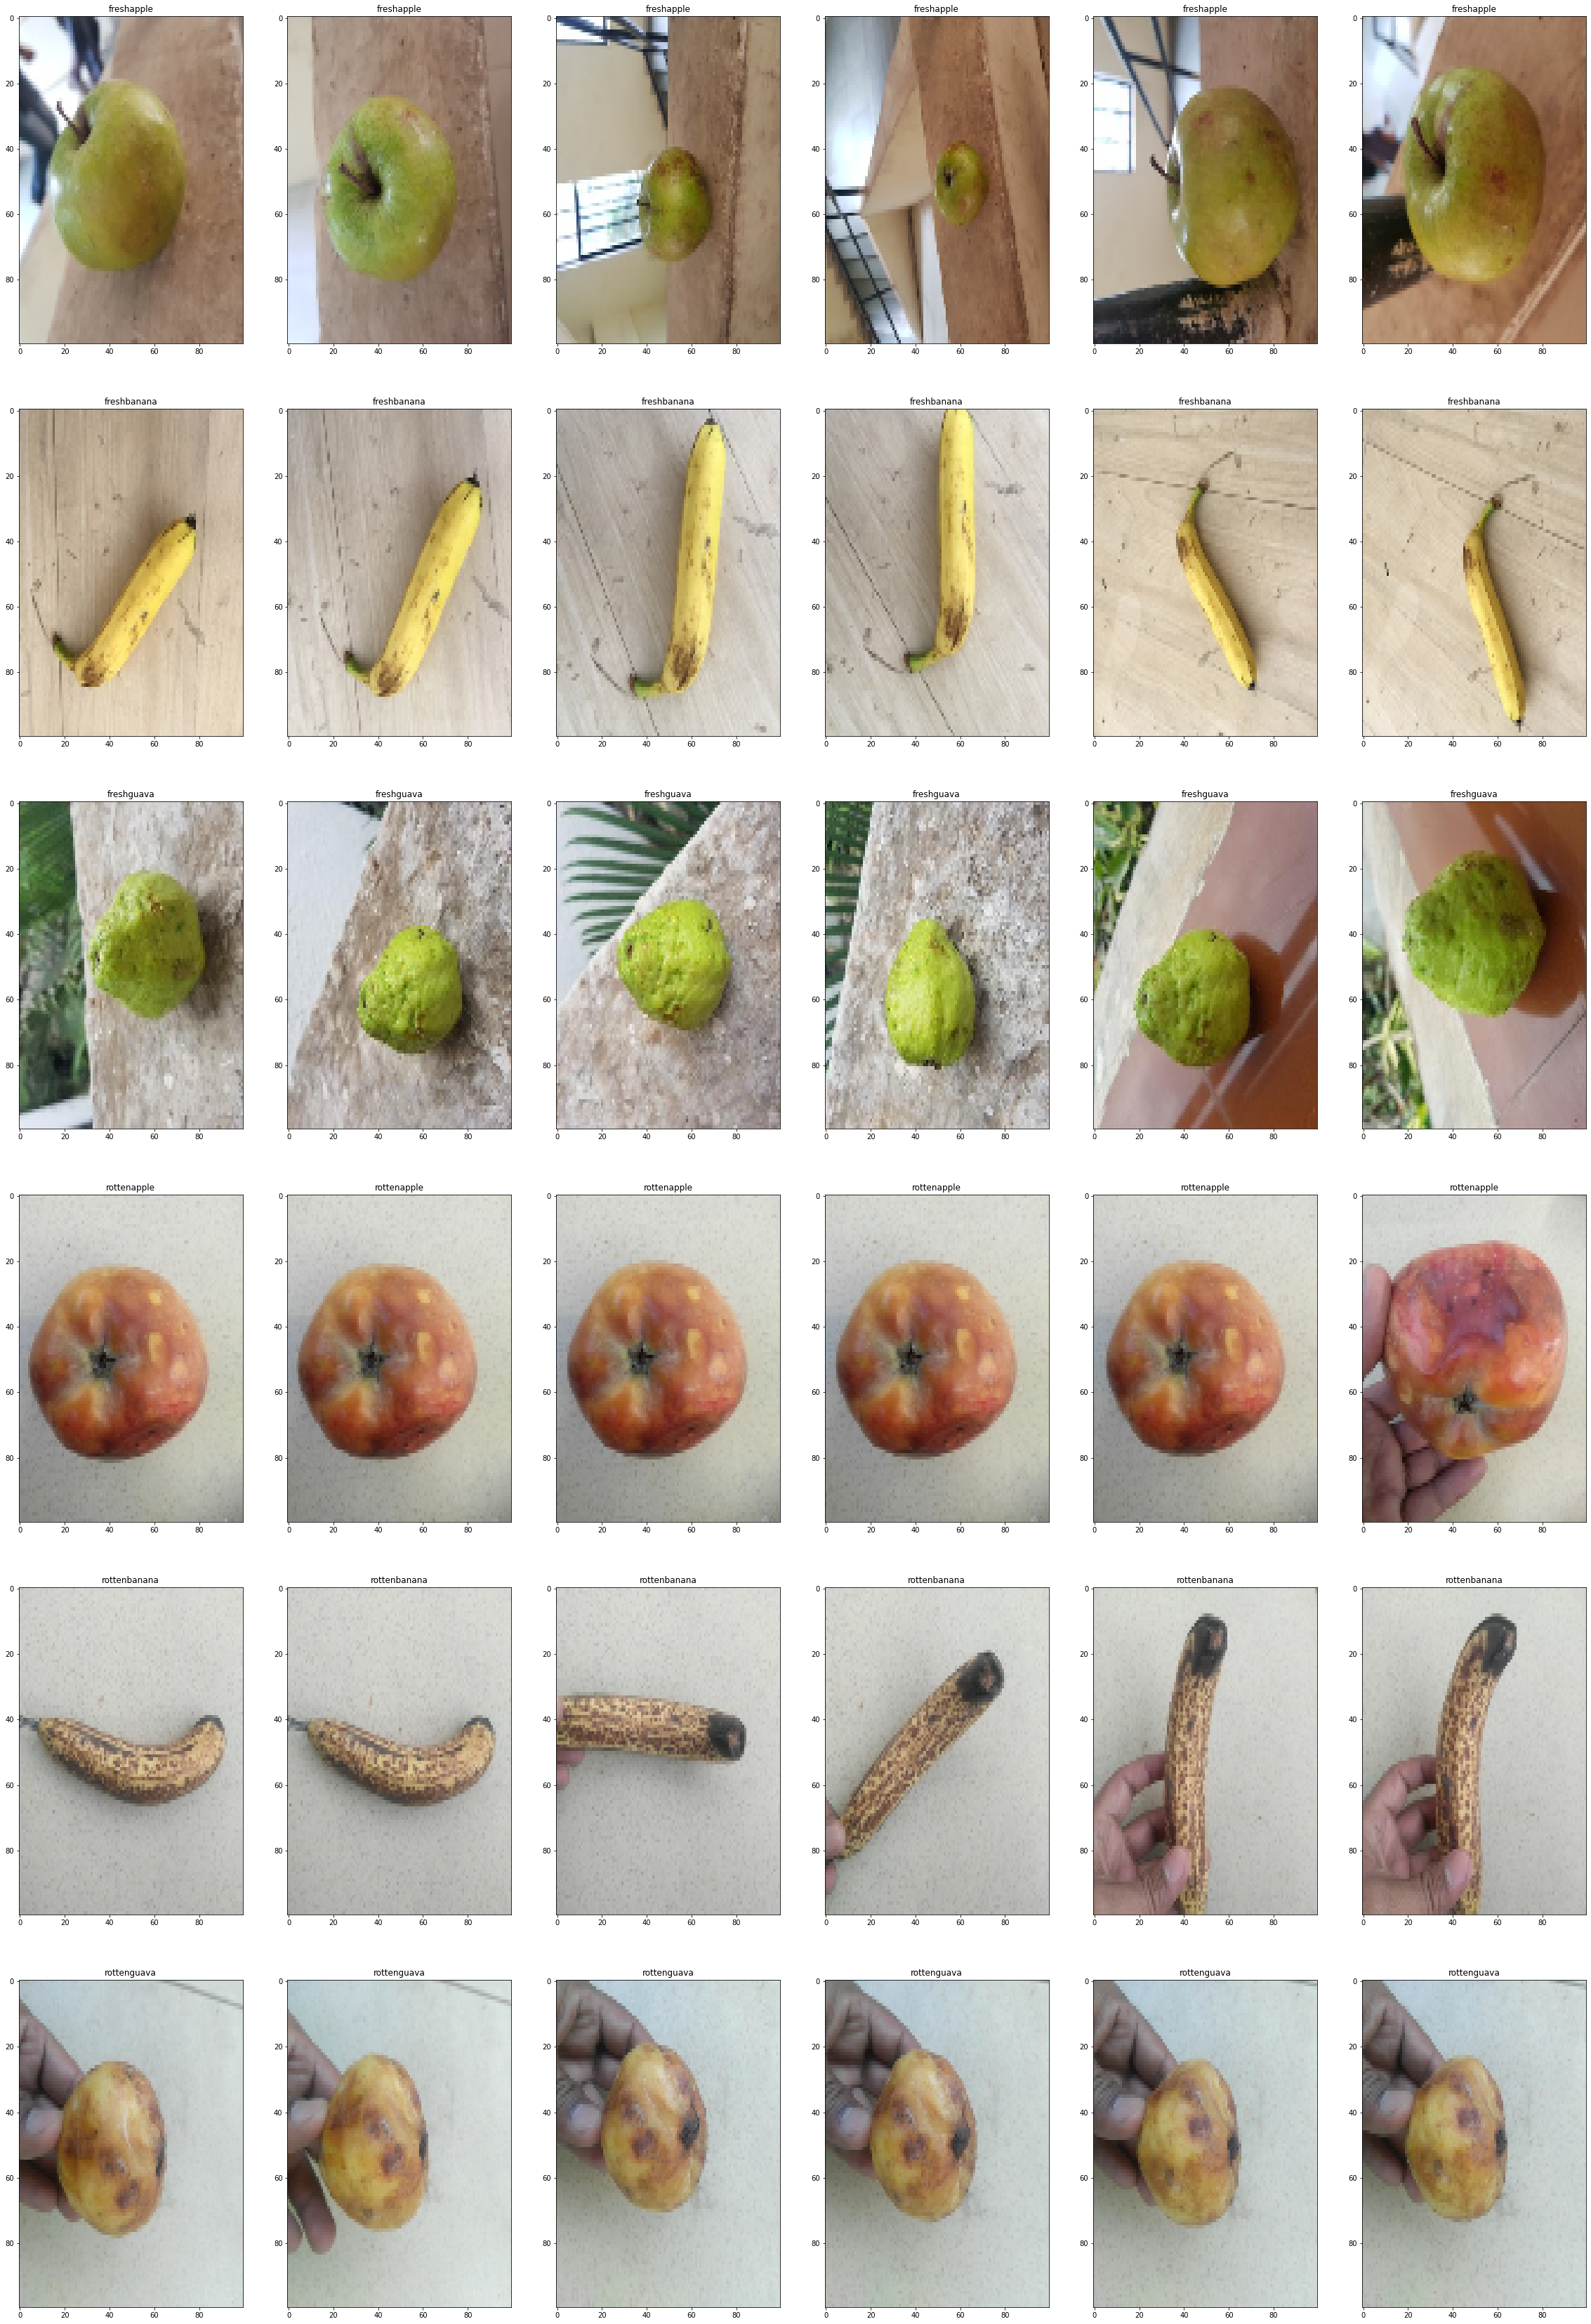

In [6]:
show_subpot(X)

In [7]:
del X

# Rotten vs fresh

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [9]:
X,Y=load_rottenvsfresh()

100%|██████████| 4200/4200 [00:00<00:00, 840581.99it/s]

Shuffling your data.....


In [10]:
Y=np.array(Y)
X=np.array(X)

In [11]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    2100
1    2100
dtype: int64

In [12]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [13]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 1800/1800 [00:00<00:00, 900816.99it/s]

Shuffling your data.....


In [14]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    900
1    900
dtype: int64

In [15]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 64)        2

In [18]:
import tensorflow as tf

In [19]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rotten1.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = 'adam', metrics=['accuracy'])

In [20]:
X=X/255.0
X_val=X_val/255.0

In [21]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
210/210 [==============================] - 178s 669ms/step - loss: 0.8798 - accuracy: 0.8502 - val_loss: 18.9136 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 18.91365, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten1.h5
Epoch 2/5
210/210 [==============================] - 139s 662ms/step - loss: 0.1083 - accuracy: 0.9671 - val_loss: 19.5066 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 18.91365
Epoch 3/5
210/210 [==============================] - 136s 649ms/step - loss: 0.0534 - accuracy: 0.9815 - val_loss: 0.9187 - val_accuracy: 0.8767

Epoch 00003: val_loss improved from 18.91365 to 0.91865, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten1.h5
Epoch 4/5
210/210 [==============================] - 139s 664ms/step - loss: 0.0609 - accuracy: 0.9833 - val_loss: 0.1745 - val_accuracy: 0.9728

Epoch 00004: val_loss improved from 0.91865 to 0.17447, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI

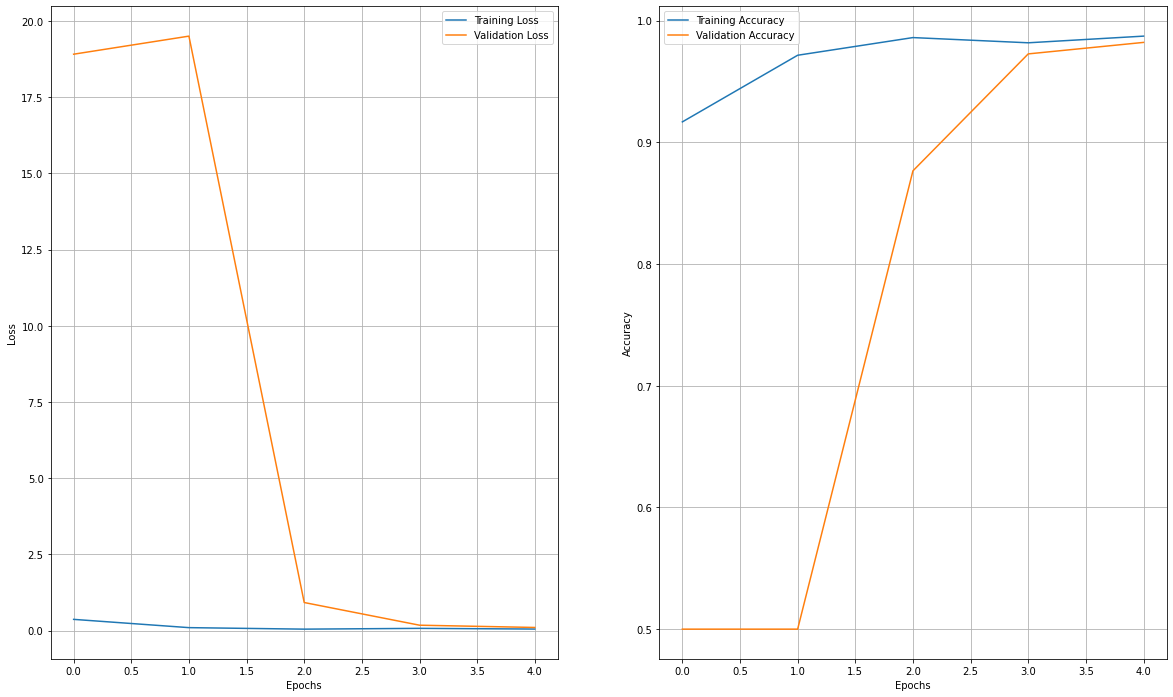

In [22]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [23]:
model.evaluate(X_val,Y_val)

57/57 [==============================] - 13s 214ms/step - loss: 0.1001 - accuracy: 0.9822


[0.10014504194259644, 0.9822221994400024]

In [24]:
model.save('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rottenvsfresh1.h5')

In [25]:
from keras.models import Model, load_model

In [26]:
new_model=load_model('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rotten1.h5')

In [27]:
new_model.evaluate(X_val,Y_val)

57/57 [==============================] - 13s 213ms/step - loss: 0.1001 - accuracy: 0.9822


[0.10014504194259644, 0.9822221994400024]

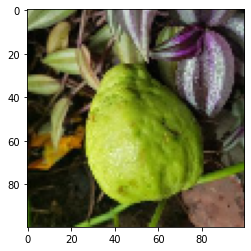

In [28]:
plt.imshow(X_val[16])

In [29]:
model.predict(X_val[16].reshape(1,100,100,3))

array([[1.634392e-32]], dtype=float32)

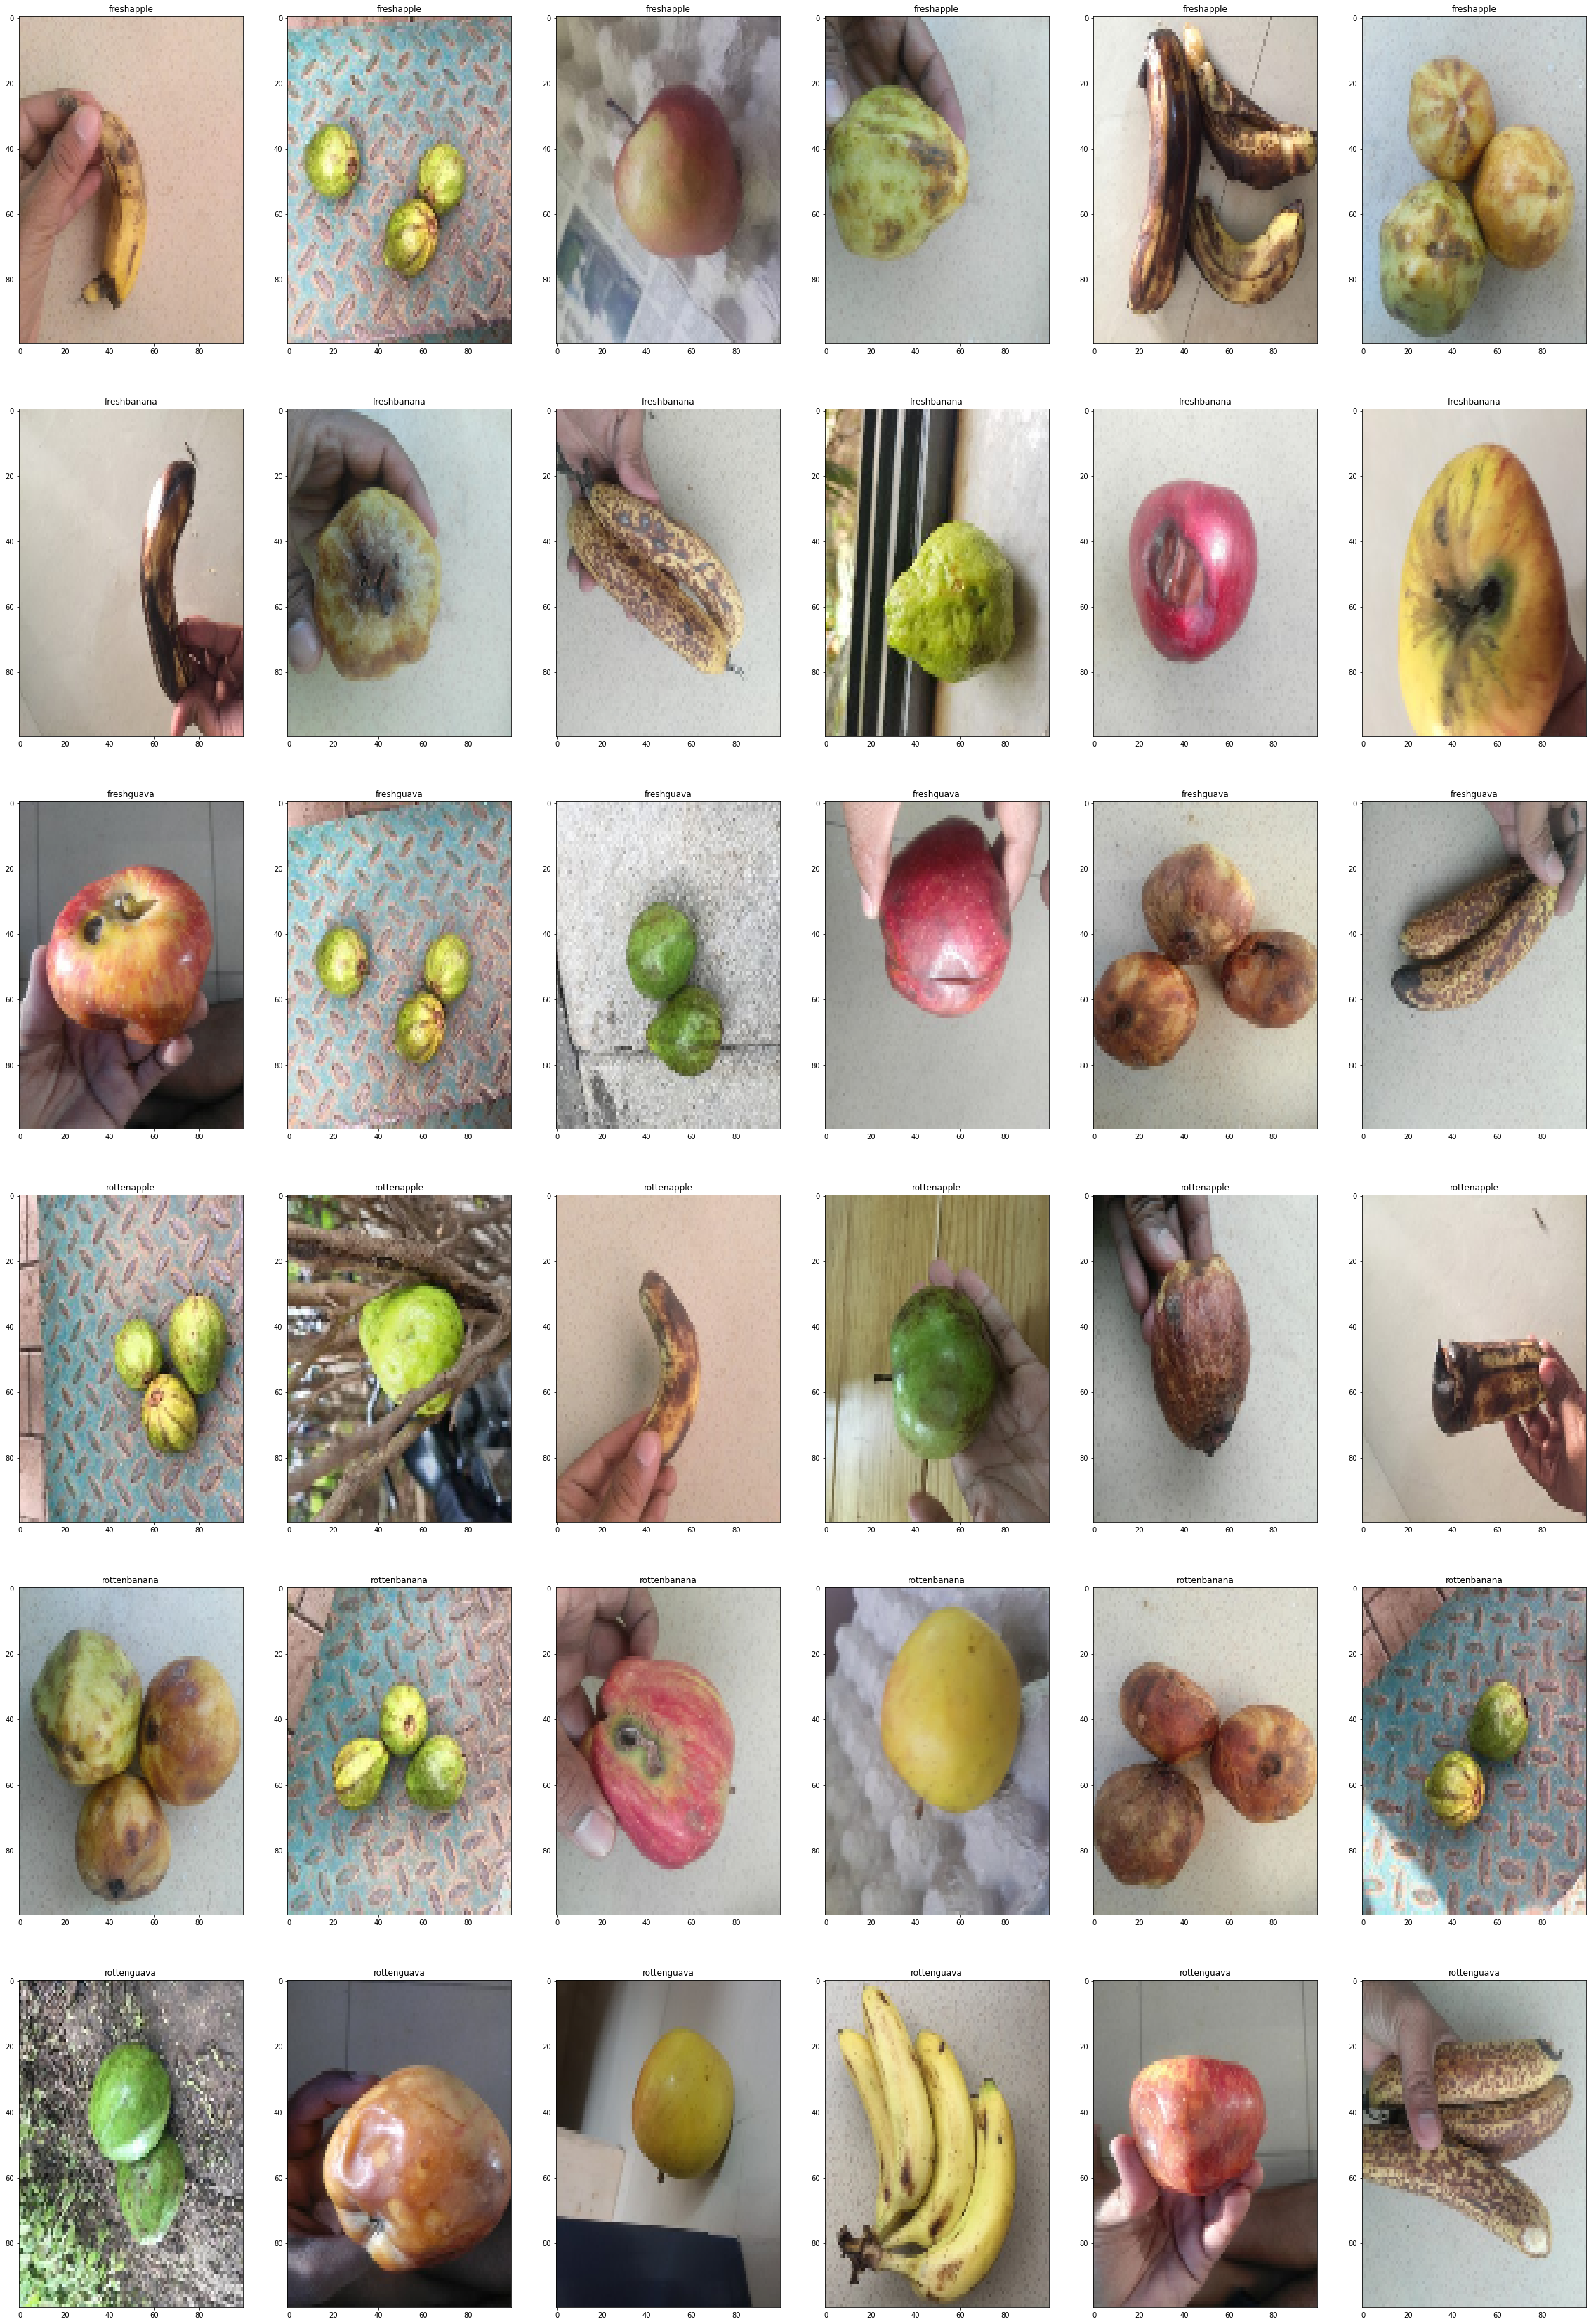

In [30]:
show_subpot(X_val[-36*11:-36*10])

In [31]:
model.predict_classes(X_val[-36*11:-36*10])

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

# Category of Fruits

In [32]:
def load_fruits_data():
    quality=['apple', 'banana','guava']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [33]:
def load_fruits_train_data():
    quality=['apple', 'banana','guava']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [34]:
X_val,Y_val=load_fruits_data()

100%|██████████| 1800/1800 [00:00<00:00, 1799272.45it/s]

Shuffling your data.....


In [35]:
X,Y=load_fruits_train_data()

100%|██████████| 4200/4200 [00:00<00:00, 1048326.40it/s]

Shuffling your data.....


In [36]:
X=np.array(X)
X_val=np.array(X_val)

In [37]:
X.shape,X_val.shape

((4200, 100, 100, 3), (1800, 100, 100, 3))

In [38]:
X=X/255.0
X_val=X_val/255.0

In [39]:
Y=to_categorical(Y)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [40]:
Y_test=to_categorical(Y_val)
Y_val=np.array(Y_val)

In [41]:
Y.shape,Y_test.shape, Y_val.shape

((4200, 3), (1800, 3), (1800,))

In [42]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [43]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/fruit_cata1.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = 'adam', metrics=['accuracy'])

In [44]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_test),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
210/210 [==============================] - 134s 612ms/step - loss: 0.4737 - accuracy: 0.8006 - val_loss: 1.1213 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 1.12134, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\fruit_cata1.h5
Epoch 2/5
210/210 [==============================] - 141s 672ms/step - loss: 0.1513 - accuracy: 0.9489 - val_loss: 1.1709 - val_accuracy: 0.3333

Epoch 00002: val_loss did not improve from 1.12134
Epoch 3/5
210/210 [==============================] - 132s 628ms/step - loss: 0.1563 - accuracy: 0.9491 - val_loss: 0.5698 - val_accuracy: 0.7322

Epoch 00003: val_loss improved from 1.12134 to 0.56984, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\fruit_cata1.h5
Epoch 4/5
210/210 [==============================] - 135s 642ms/step - loss: 0.0868 - accuracy: 0.9731 - val_loss: 2.8724 - val_accuracy: 0.6156

Epoch 00004: val_loss did not improve from 0.56984
Epoch 5/5
210/210 [==============================] - 127

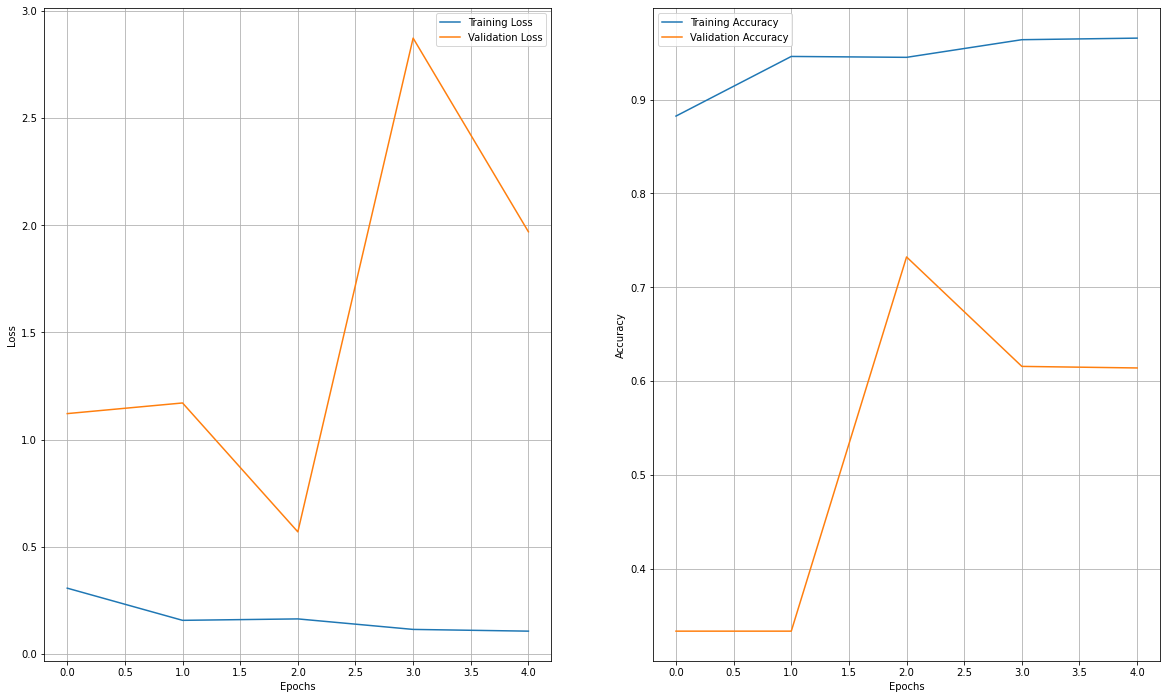

In [45]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [46]:
model=load_model('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/fruit_cata1.h5')

In [47]:
model.evaluate(X,Y)

132/132 [==============================] - 32s 226ms/step - loss: 0.5574 - accuracy: 0.7517


[0.5573729276657104, 0.7516666650772095]

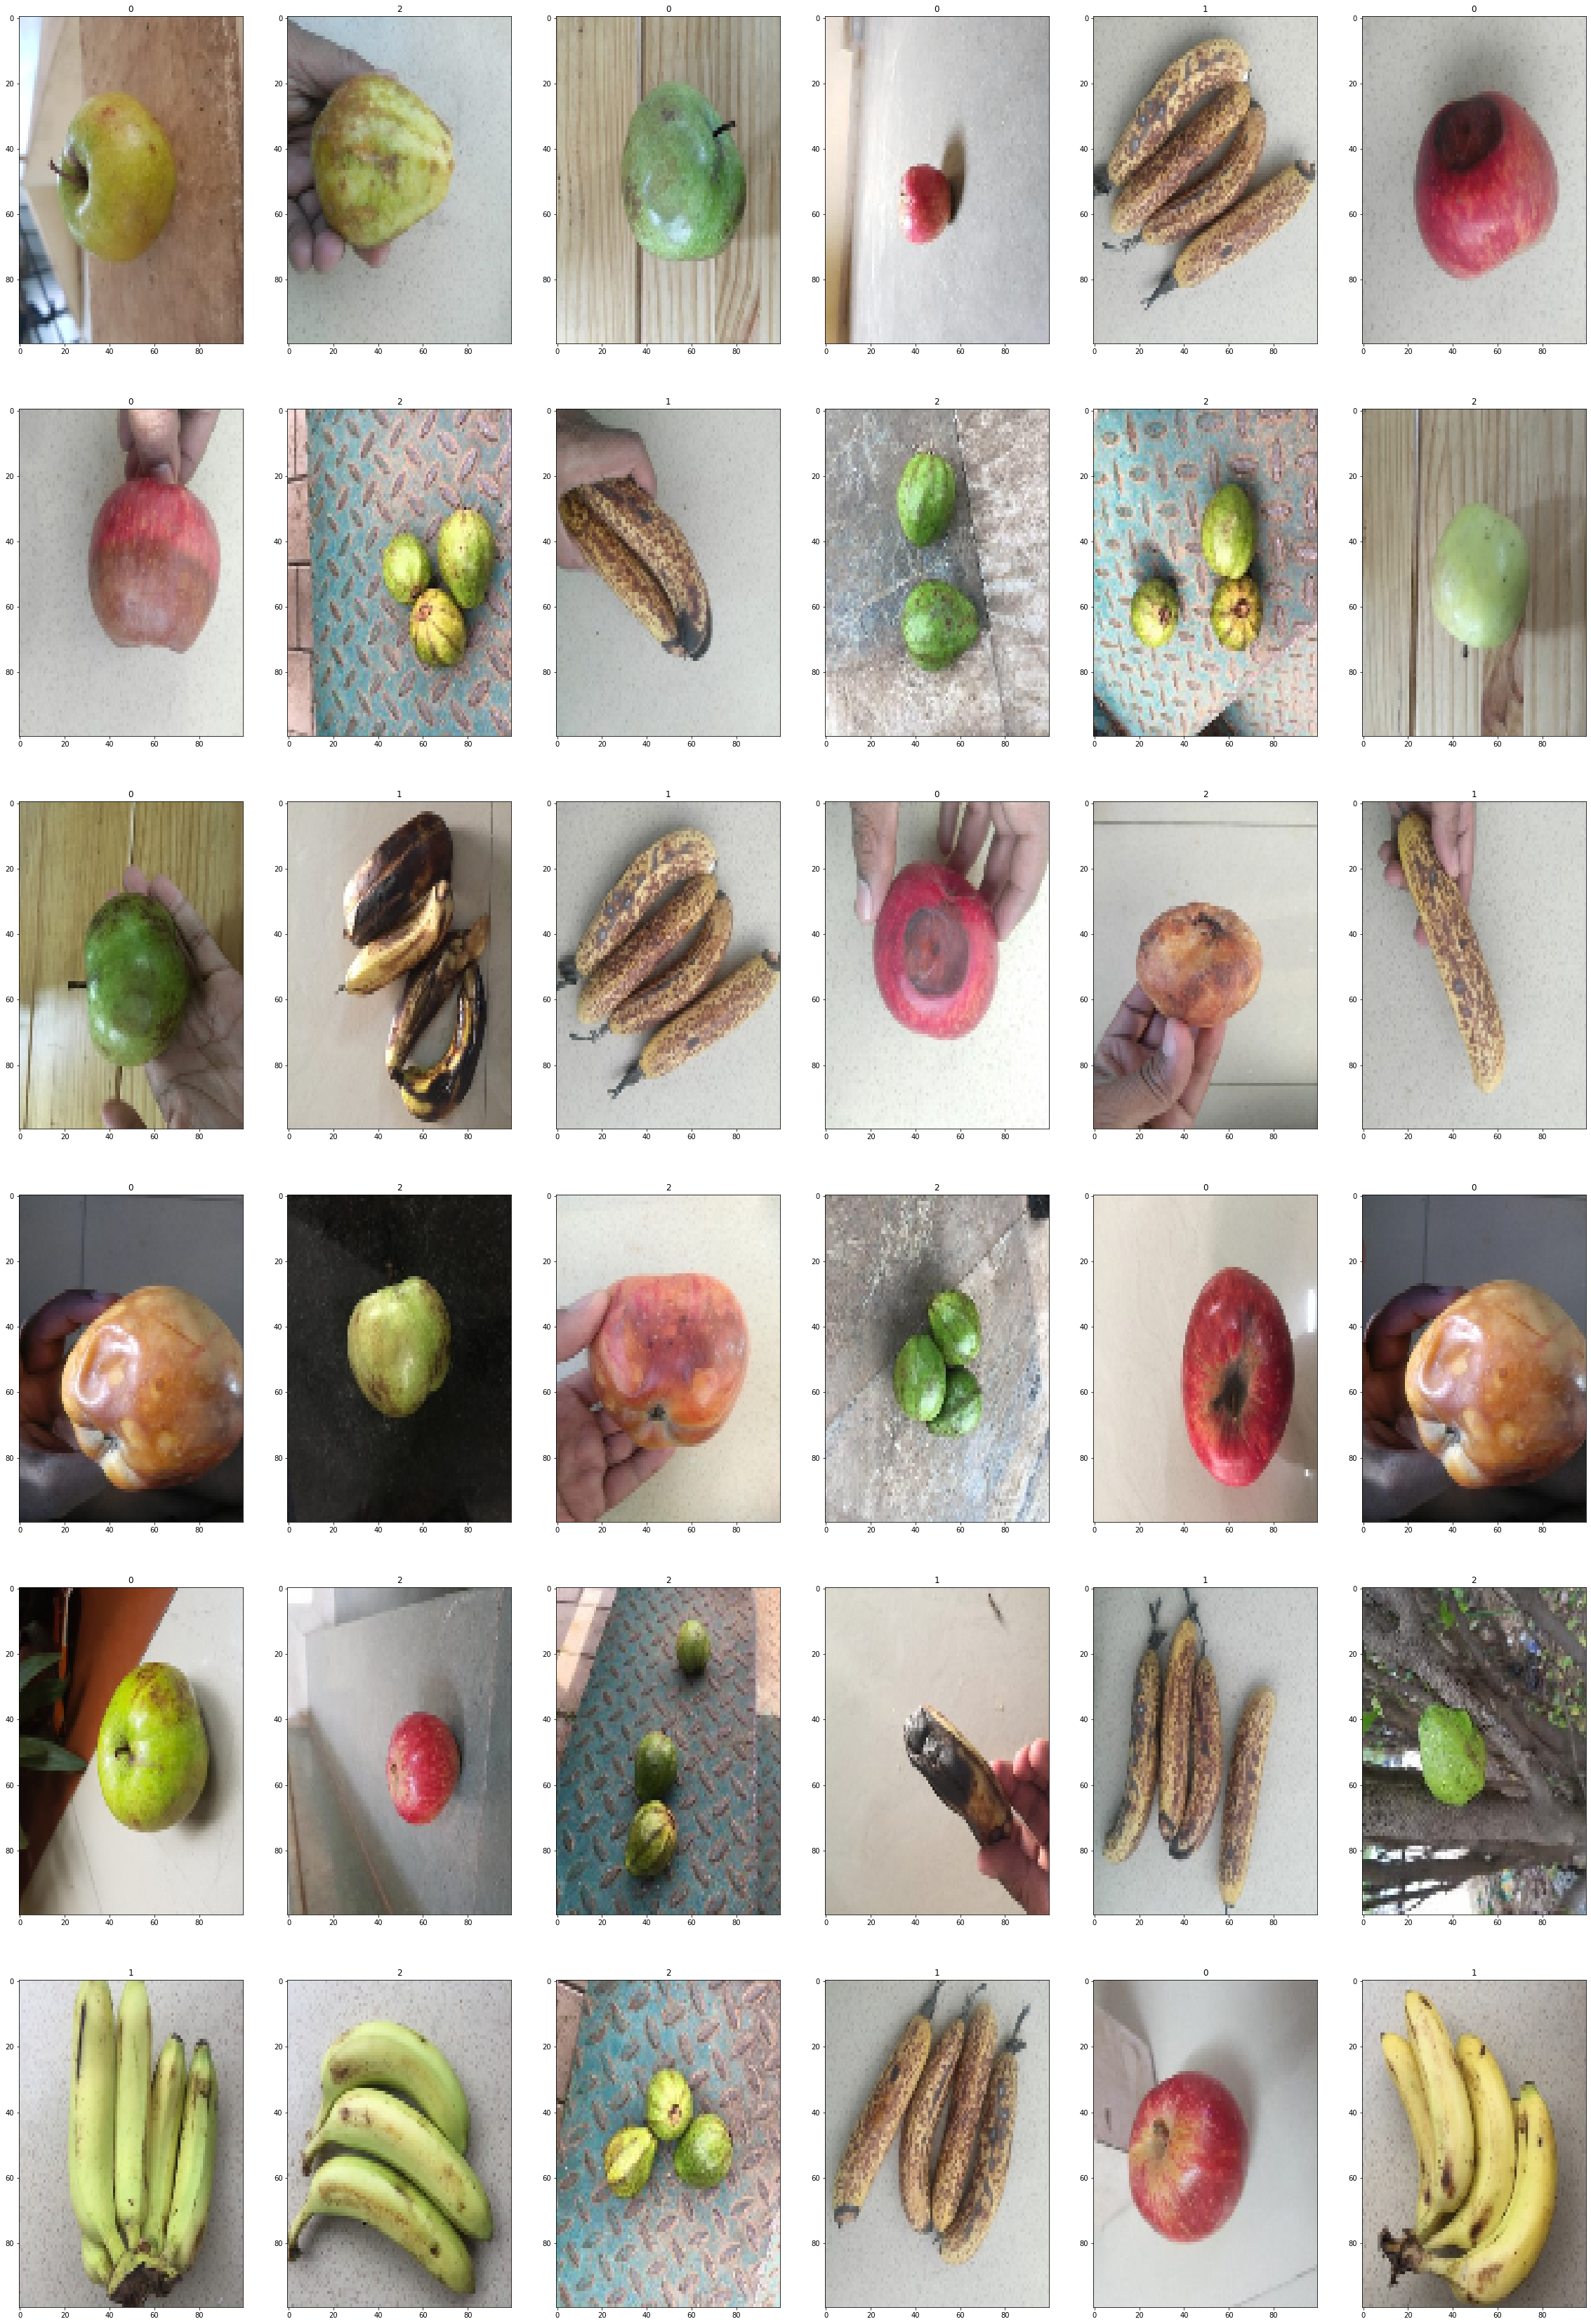

In [48]:
show_subpot(X_val[:36],title=True,Y=model.predict_classes(X_val[:36]))

In [49]:
model.predict_classes(X_val[:36])

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1], dtype=int64)

In [53]:
pickle.dump(model, 'model.pkl')

TypeError: file must have a 'write' attribute

In [ ]:
filePath = 'model.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_model = joblib.load(file)